# Model iteration

Adding layers to original FSM

In [27]:
import os
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Flatten
from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load images for modeling

Use `ImageDataGenerator` class from Keras with `flow_from_directory` method to feed images into the model.

Keeping default parameters for now as far as `target_size=(256, 256)` and all that.

In [2]:
# Image folder for training
train_dir = 'input_images/train'

In [17]:
# Delete metadata files created by Mac OS
!find . -name ".DS_Store" -delete

In [4]:
# Get data from directories and scale
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
val_gen = datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1009 images belonging to 2 classes.
Found 252 images belonging to 2 classes.


## Build model and train

In [5]:
# Instatiate model
nn_model_1 = models.Sequential()

# Add model layers
nn_model_1.add(Flatten(input_shape=(256, 256, 3)))
nn_model_1.add(Dense(512, activation='relu'))
nn_model_1.add(Dense(64, activation='relu'))
nn_model_1.add(Dense(32, activation='relu'))
nn_model_1.add(Dense(12, activation='relu'))
nn_model_1.add(Dense(1, activation='sigmoid'))

# Compile
nn_model_1.compile(optimizer='sgd',
                   loss='binary_crossentropy',
                   metrics=['acc', 'Recall', 'Precision'])

In [7]:
nn_model_1_history = nn_model_1.fit(train_gen, 
                                    epochs=20,
                                    validation_data=val_gen)

Epoch 1/20
32/32 [==============================] - 127s 4s/step - loss: 0.7375 - acc: 0.5253 - recall: 0.4990 - precision: 0.5314 - val_loss: 0.6772 - val_acc: 0.6587 - val_recall: 0.7795 - val_precision: 0.6306
Epoch 2/20
32/32 [==============================] - 122s 4s/step - loss: 0.6707 - acc: 0.5937 - recall: 0.5088 - precision: 0.6181 - val_loss: 0.6485 - val_acc: 0.6667 - val_recall: 0.5512 - val_precision: 0.7216
Epoch 3/20
32/32 [==============================] - 122s 4s/step - loss: 0.6267 - acc: 0.6511 - recall: 0.6208 - precision: 0.6653 - val_loss: 0.6489 - val_acc: 0.5952 - val_recall: 0.2756 - val_precision: 0.7778
Epoch 4/20
32/32 [==============================] - 123s 4s/step - loss: 0.6377 - acc: 0.6194 - recall: 0.5128 - precision: 0.6574 - val_loss: 0.6108 - val_acc: 0.6667 - val_recall: 0.4567 - val_precision: 0.7945
Epoch 5/20
32/32 [==============================] - 123s 4s/step - loss: 0.6008 - acc: 0.6581 - recall: 0.5560 - precision: 0.7040 - val_loss: 0.699

In [8]:
nn_model_1.save('models/nn_model_1.h5')

Training eval:
32/32 [==============================] - 103s 3s/step - loss: 0.4355 - acc: 0.7830 - recall: 0.6365 - precision: 0.9050

Validation eval:
8/8 [==============================] - 17s 2s/step - loss: 0.5303 - acc: 0.7341 - recall: 0.7244 - precision: 0.7419


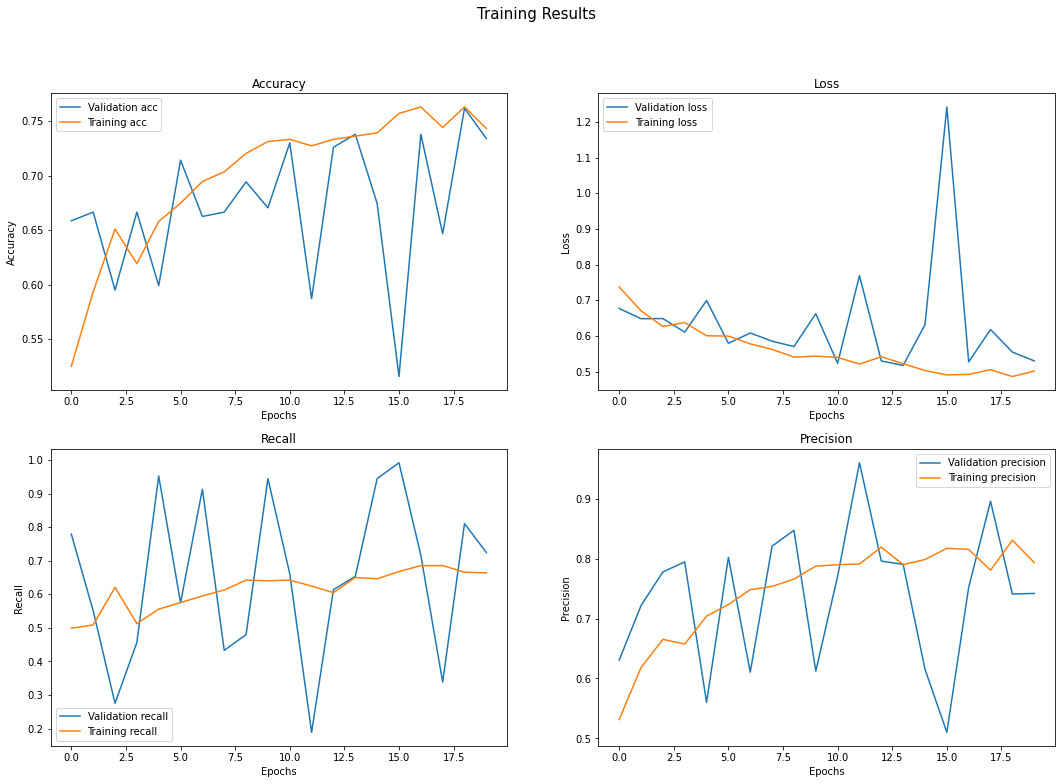

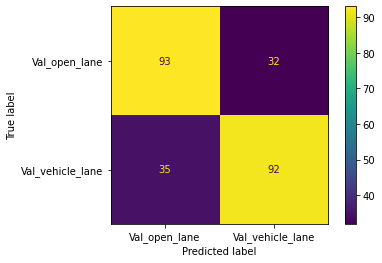

In [9]:
visualize_results(nn_model_1_history, nn_model_1, train_gen, val_gen)

In [16]:
# Pickle results
from pickle import load
from pickle import dump

dump(nn_model_1_history.history, open('models/nn_model_1_history.pkl', 'wb'))

This shows a significant improvement over my FSM. Accuracy improved from 70%-->73%, while recall and precision are more balanced. Non-target class true predictions increased by about 50%.

## Next iteration



Before moving on to CNNs, I also want to try image augmentation using the parameters built into `ImageDataGenerator`. I'll keep all other parameters the same as above to gauge the impact.

**Note:** Between the last iteration and this one, I have reduced the size of the testing/holdout set from 100/class to 50/class (100 total, which is what I thought it was doing in the first place). I am also reducing the `validation_split` to 0.1 down from 0.2 in order to maximize the size of my training set.

In [22]:
# Get data from directories and scale
datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.1,
                             horizontal_flip=True,
                             rotation_range=30, 
                             width_shift_range=.1, 
                             height_shift_range=.1,
                             brightness_range=[0.5, 1.5], 
                             zoom_range=.2)

train_gen = datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
val_gen = datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1226 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


The "Found x images" statements above confirm the changes in size to training dataset and validation split.

In [23]:
# Instatiate model
nn_model_2 = models.Sequential()

# Add model layers
nn_model_2.add(Flatten(input_shape=(256, 256, 3)))
nn_model_2.add(Dense(512, activation='relu'))
nn_model_2.add(Dense(64, activation='relu'))
nn_model_2.add(Dense(32, activation='relu'))
nn_model_2.add(Dense(12, activation='relu'))
nn_model_2.add(Dense(1, activation='sigmoid'))

# Compile
nn_model_2.compile(optimizer='sgd',
                   loss='binary_crossentropy',
                   metrics=['acc', 'Recall', 'Precision'])

In [24]:
nn_model_2_history = nn_model_2.fit(train_gen, 
                                    epochs=20,
                                    validation_data=val_gen)

Epoch 1/20
39/39 [==============================] - 161s 4s/step - loss: 0.7013 - acc: 0.5440 - recall: 0.5631 - precision: 0.5463 - val_loss: 0.6800 - val_acc: 0.5407 - val_recall: 0.8971 - val_precision: 0.5259
Epoch 2/20
39/39 [==============================] - 156s 4s/step - loss: 0.6668 - acc: 0.5865 - recall: 0.6052 - precision: 0.5871 - val_loss: 0.6793 - val_acc: 0.5407 - val_recall: 0.1176 - val_precision: 0.8000
Epoch 3/20
39/39 [==============================] - 154s 4s/step - loss: 0.6568 - acc: 0.6387 - recall: 0.5825 - precision: 0.6606 - val_loss: 0.6609 - val_acc: 0.6074 - val_recall: 0.8529 - val_precision: 0.5743
Epoch 4/20
39/39 [==============================] - 152s 4s/step - loss: 0.6482 - acc: 0.6207 - recall: 0.5744 - precision: 0.6373 - val_loss: 0.6092 - val_acc: 0.7037 - val_recall: 0.6765 - val_precision: 0.7188
Epoch 5/20
39/39 [==============================] - 153s 4s/step - loss: 0.6242 - acc: 0.6591 - recall: 0.6084 - precision: 0.6812 - val_loss: 0.667

In [25]:
nn_model_2.save('models/nn_model_2.h5')

Training eval:
39/39 [==============================] - 139s 4s/step - loss: 0.6016 - acc: 0.6623 - recall: 0.3916 - precision: 0.8643

Validation eval:
5/5 [==============================] - 8s 2s/step - loss: 0.5794 - acc: 0.7037 - recall: 0.5147 - precision: 0.8333


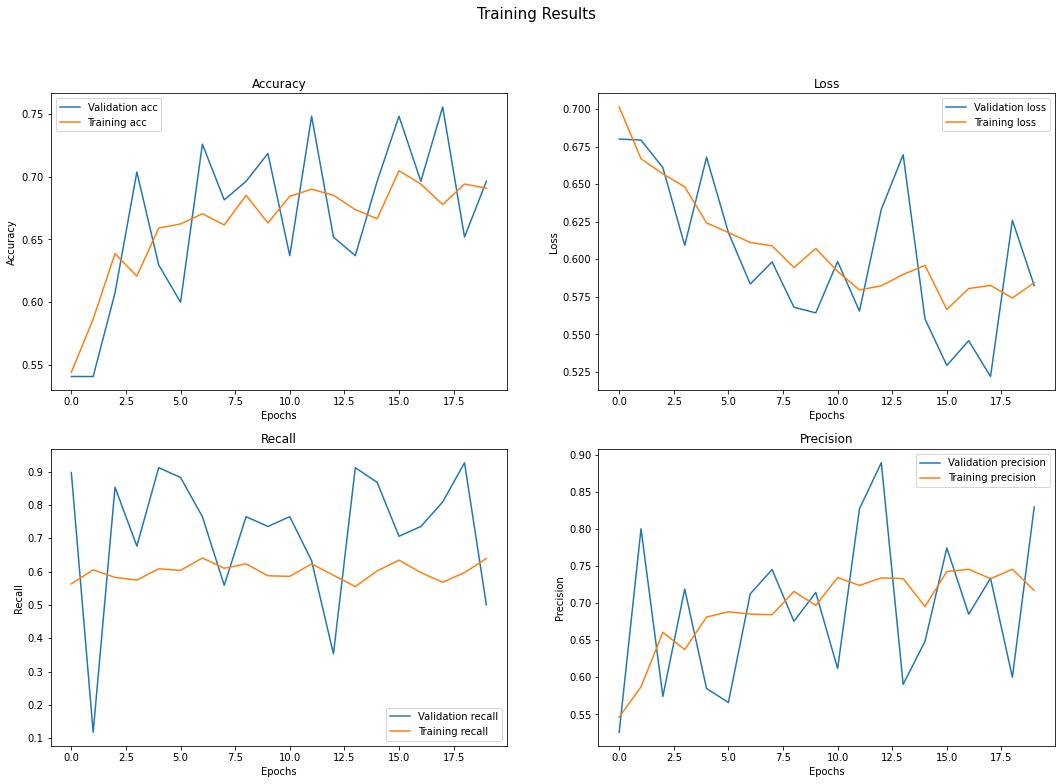

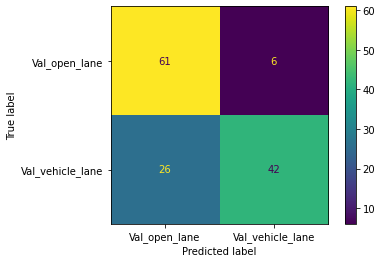

In [26]:
visualize_results(nn_model_2_history, nn_model_2, train_gen, val_gen)

In [28]:
dump(nn_model_2_history.history, open('models/nn_model_2_history.pkl', 'wb'))

This model did worse than before, it would seem. Although precision is up in the validation set, overall accuracy is back down to FSM levels (and lower in the training set--yikes). Perhaps there were too many augmentations? That could have made it difficult for the model to actually get a handle on the patterns in the data? 

*(It also seems like my pickling as part of the `visualize_results` function isn't working...Probably because I'm trying to use a model object as a string, which doesn't work, obviously. I'll just keep it manual.)*

I'm going to try this again, but with fewer augmentations. For now I'll just stick with `horizontal_flip` and maybe a limited `brightness_range`. I remember from Phase 4 that the `Adam` optimizer also did better than `sgd`, so let's go ahead and change that as well.

In [34]:
# Get data from directories and scale
datagen = ImageDataGenerator(rescale=1./255, 
                             validation_split=0.1,
                             horizontal_flip=True,
                             brightness_range=[0.6, 1.4])

train_gen = datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
val_gen = datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1226 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [36]:
# Instatiate model
nn_model_3 = models.Sequential()

# Add model layers
nn_model_3.add(Flatten(input_shape=(256, 256, 3)))
nn_model_3.add(Dense(512, activation='relu'))
nn_model_3.add(Dense(64, activation='relu'))
nn_model_3.add(Dense(32, activation='relu'))
nn_model_3.add(Dense(12, activation='relu'))
nn_model_3.add(Dense(1, activation='sigmoid'))

# Compile
nn_model_3.compile(optimizer='Adam',
                   loss='binary_crossentropy',
                   metrics=['acc', 'Recall', 'Precision'])

In [37]:
nn_model_3_history = nn_model_3.fit(train_gen, 
                                    epochs=20,
                                    validation_data=val_gen)

Epoch 1/20
39/39 [==============================] - 157s 4s/step - loss: 12.7637 - acc: 0.5294 - recall: 0.5340 - precision: 0.5331 - val_loss: 3.8951 - val_acc: 0.6519 - val_recall: 0.7941 - val_precision: 0.6207
Epoch 2/20
39/39 [==============================] - 150s 4s/step - loss: 2.7291 - acc: 0.6868 - recall: 0.6780 - precision: 0.6937 - val_loss: 1.0519 - val_acc: 0.7481 - val_recall: 0.7206 - val_precision: 0.7656
Epoch 3/20
39/39 [==============================] - 141s 4s/step - loss: 2.7432 - acc: 0.6387 - recall: 0.6327 - precision: 0.6442 - val_loss: 1.4853 - val_acc: 0.7037 - val_recall: 0.9265 - val_precision: 0.6429
Epoch 4/20
39/39 [==============================] - 147s 4s/step - loss: 2.4565 - acc: 0.6525 - recall: 0.6408 - precision: 0.6600 - val_loss: 1.0237 - val_acc: 0.7407 - val_recall: 0.7794 - val_precision: 0.7260
Epoch 5/20
39/39 [==============================] - 140s 4s/step - loss: 2.9397 - acc: 0.6395 - recall: 0.6278 - precision: 0.6467 - val_loss: 4.45

In [38]:
nn_model_3.save('models/nn_model_3.h5')

Training eval:
39/39 [==============================] - 133s 3s/step - loss: 0.5296 - acc: 0.7145 - recall: 0.9854 - precision: 0.6411

Validation eval:
5/5 [==============================] - 7s 1s/step - loss: 0.9084 - acc: 0.6074 - recall: 0.9706 - precision: 0.5641


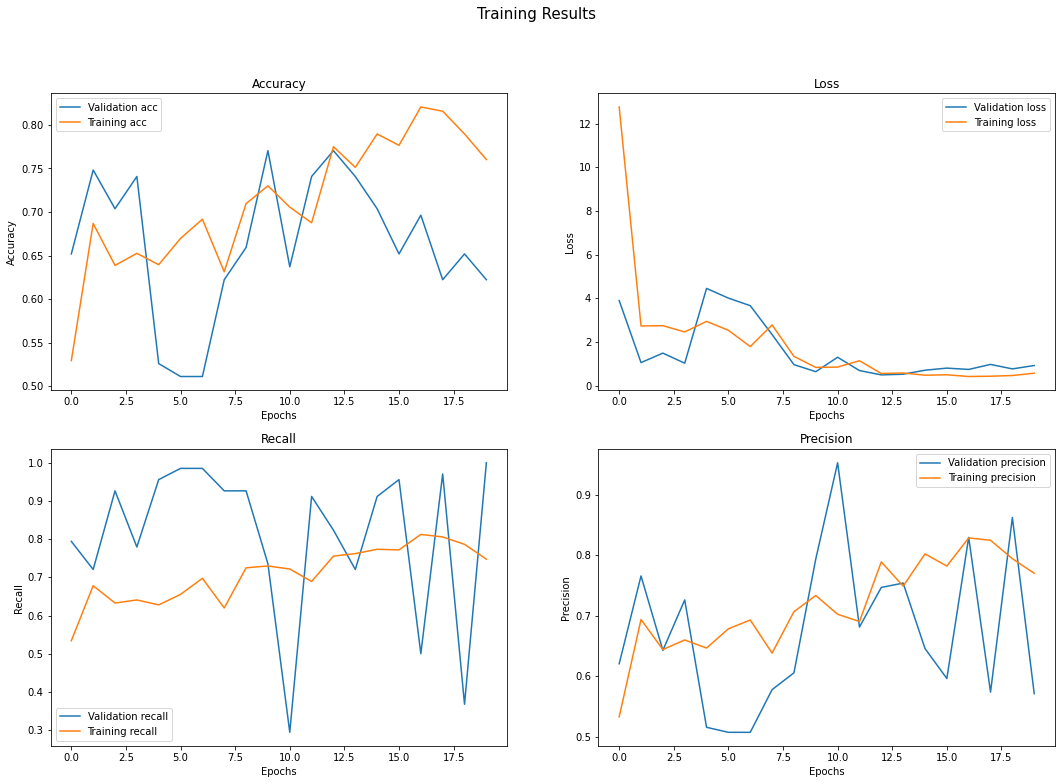

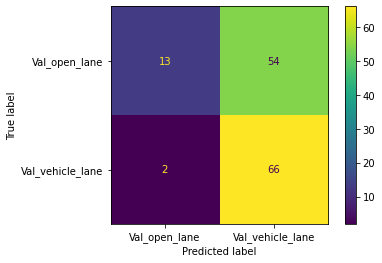

In [39]:
visualize_results(nn_model_3_history, nn_model_3, train_gen, val_gen)

In [40]:
dump(nn_model_3_history.history, open('models/nn_model_3_history.pkl', 'wb'))

Is it possible to see some of the images that are being misclassified, especially the false positives?

In [51]:
y_preds = nn_model_3.predict(val_gen)

In [62]:
(y_preds>0.5).astype('int32').reshape((-1))

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [66]:
# Get indicies of misclassfied images
# From https://stackoverflow.com/questions/39300880/how-to-find-wrong-prediction-cases-in-test-set-cnns-using-keras
incorrects = np.nonzero((y_preds>0.5).reshape((-1,)) != val_gen.labels)[0]

In [67]:
incorrects

array([  0,   1,   2,   3,   4,   5,   6,   7,  10,  11,  12,  13,  14,
        16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,  28,  29,
        30,  32,  33,  35,  38,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  50,  51,  52,  54,  55,  56,  58,  59,  60,  61,  62,  63,
       105, 120])

In [68]:
# Lists of indicies
false_positives = [i for i in incorrects if val_gen.labels[i]==0]
false_negatives = [i for i in incorrects if val_gen.labels[i]==1]
print(f'There are {len(false_positives)} false positives.')
print(f'There are {len(false_negatives)} false negatives.')

There are 52 false positives.
There are 2 false negatives.


In [69]:
imgs = val_gen.next()

In [73]:
imgs[0].shape

(32, 256, 256, 3)

In [74]:
imgs2 = val_gen.next()

In [80]:
val_imgs = np.concatenate((imgs[0], imgs2[0]))

IndexError: list index out of range

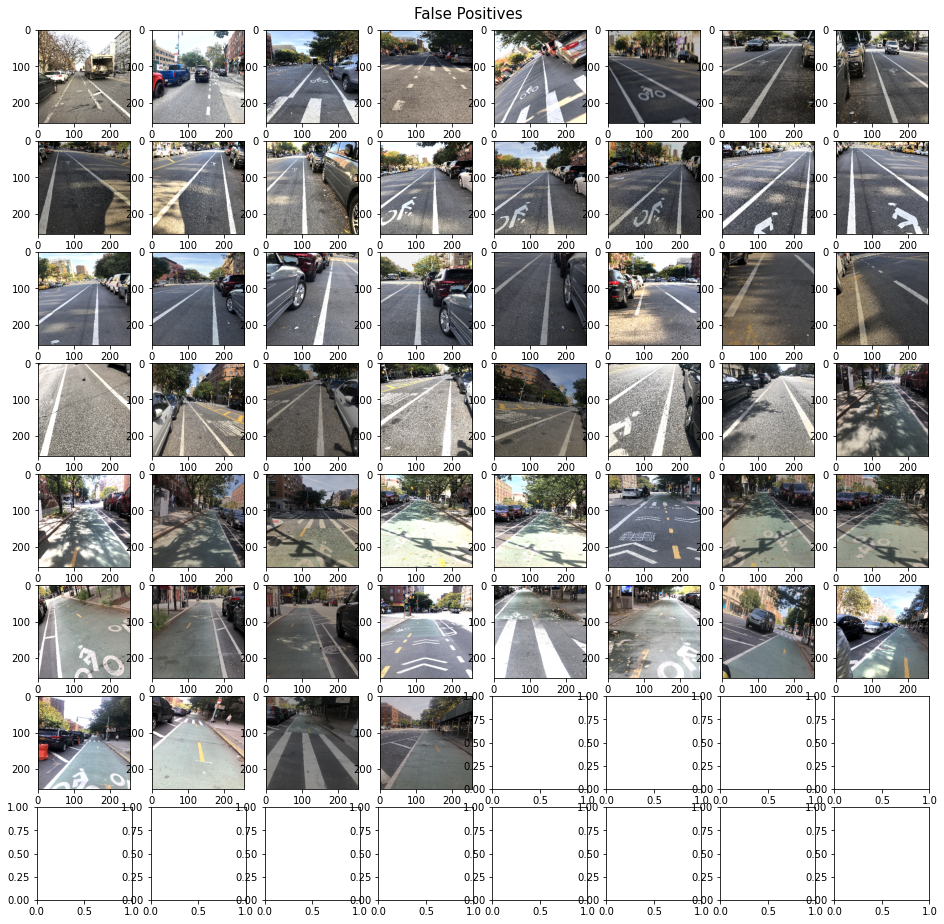

In [87]:
fig, axs = plt.subplots(8, 8, figsize=(16, 16))
fig.suptitle('False Positives', fontsize=15, y=0.9)
for i, ax in enumerate(axs.ravel()):
    ax.imshow(val_imgs[false_positives[i]])

I don't see anything specific in these photos that obviously indicates a pattern in misclassification, other than perhaps the crosswalk or other symbols? Probably need to compare to true negatives.

In [86]:
corrects = np.nonzero((y_preds>0.5).reshape((-1,)) == val_gen.labels)[0]
true_negatives = [i for i in corrects if val_gen.labels[i]==0]

IndexError: index 64 is out of bounds for axis 0 with size 64

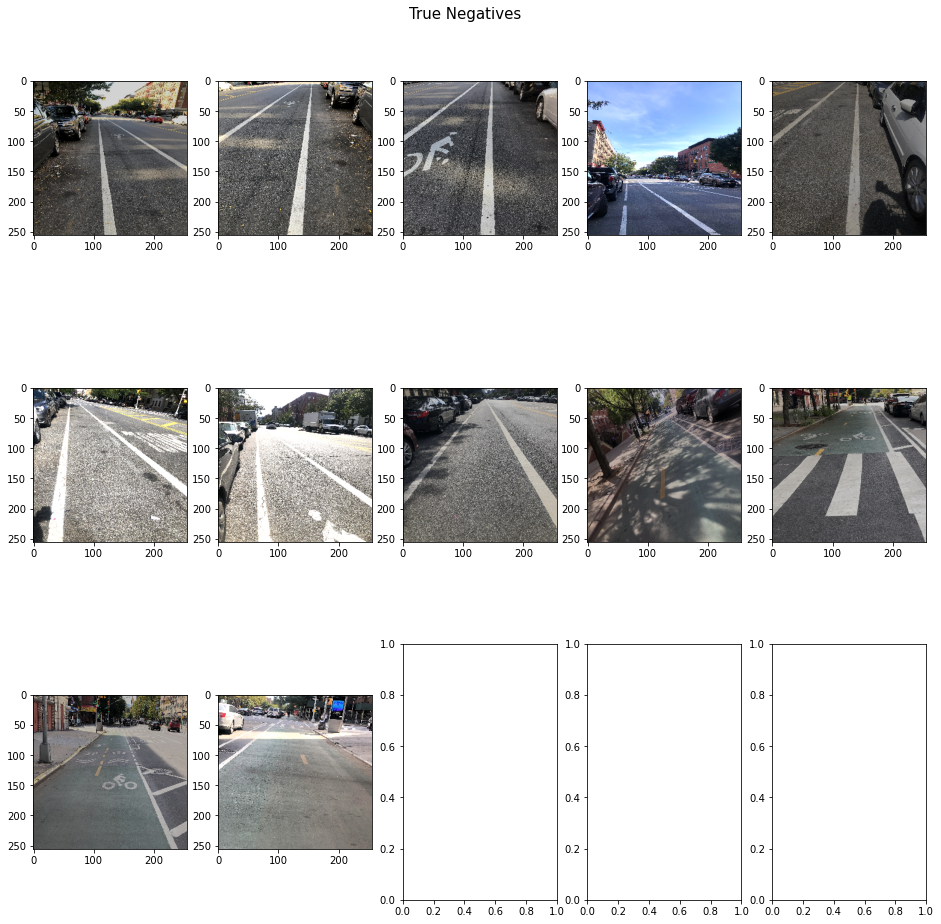

In [91]:
fig, axs = plt.subplots(3, 5, figsize=(16, 16))
fig.suptitle('True Negatives', fontsize=15, y=0.9)
for i, ax in enumerate(axs.ravel()):
    ax.imshow(val_imgs[true_negatives[i]])

Unclear if I've done this correctly and at this point in the day (5:20pm on Thursday) I'm starting to go cross-eyed. Will have to pick this up later/tomorrow.